# We have to Analysis the Data Set of Uber

# Required Libraries are imported 

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
# Reade the CSV file
dataset = pd.read_csv("F:/AI Data and Projects/AI Projects/19.Uber Project/My Uber Drives - 2016.csv")
dataset

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [124]:
# see the shape of data with row and columns
dataset.shape

(1156, 7)

In [126]:
# see the information of your dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing time

In [129]:
# In this scenario we have to deal with missing values , the date column has no right formate we have to set it,
# date is in object=string data type we have to convert into proper date and time formate

In [131]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [133]:
# Replace NaN with Not
dataset['PURPOSE*'].fillna('NOT', inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_6452\466571423.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE*'].fillna('NOT', inplace = True)


In [135]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [137]:
# Change the start and end date formate


In [139]:
dataset['START_DATE*'] = pd.to_datetime(dataset['START_DATE*'], errors='coerce')

In [141]:
dataset['END_DATE*'] = pd.to_datetime(dataset['END_DATE*'], errors='coerce')

In [143]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1156 non-null   float64       
 6   PURPOSE*     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [145]:
# Create two new columns, for the sepration of date and time

In [147]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE*']).date

In [149]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06


In [151]:
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE*']).hour

In [153]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [155]:
# Dividing into categories like Morning Ride, Evening Ride, Afternoon Ride, Night Ride
dataset['day-night'] = pd.cut(x=dataset['time'], bins=[0,10,15,19,24], labels=['Morning', 'Afternoon', 'Evening', 'Night'])

In [157]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [159]:
# Drop the null values
dataset.dropna(inplace = True)

In [161]:
dataset.shape

(1136, 10)

In [163]:
# Now all the pre-processing work is done. Now its time to visualize the data according to the quesions

# Questions

In [166]:
# 1. In which category do people book the most Uber rides?
# 2. For which purpose do people book Uber rides the most?
# 3. At what time do people book cabs the most from Uber?
# 4. In which months do people book Uber rides less frequently?
# 5. On which days of the week do people book the Uber rides the most?
# 6. How many miles do people usually book a cab for through Uber?

# Visualization Portition

<Axes: xlabel='count', ylabel='PURPOSE*'>

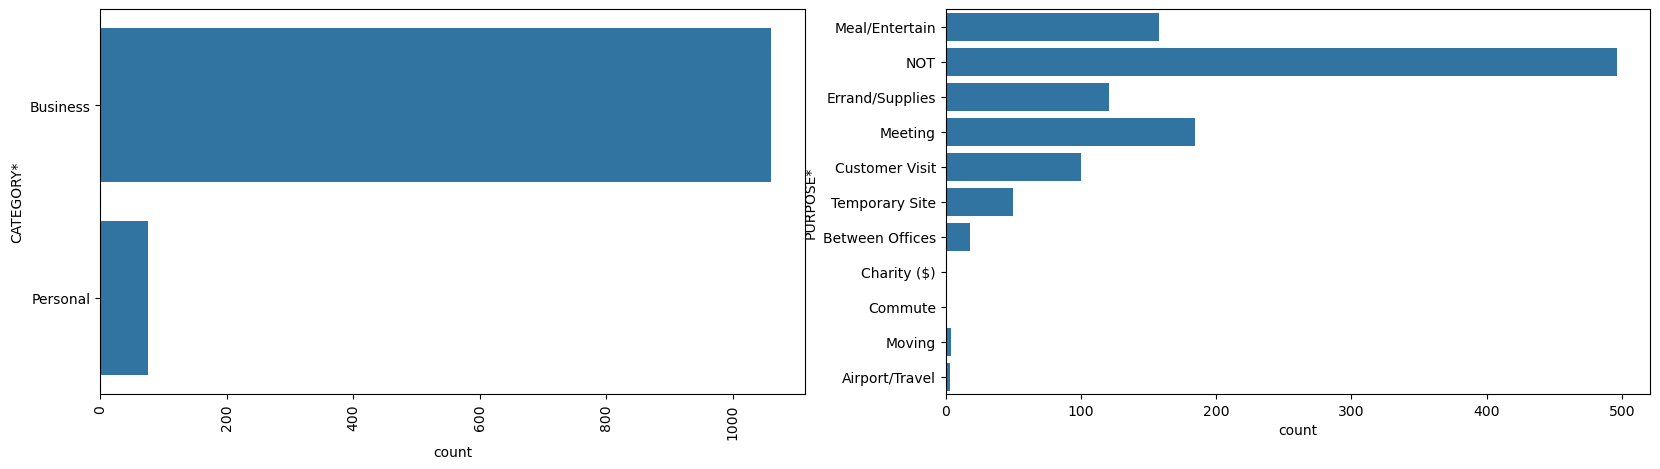

In [172]:
# 1. In which category do people book the most Uber rides?
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)

sns.countplot(dataset['CATEGORY*'])
plt.xticks(rotation=90)

# 2. For which purpose do people book Uber rides the most?

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE*'])

In [174]:
# Mostly people lies in the category of "Business" & Purpose in "Meeting"

In [176]:
# 3. At what time do people book cabs the most from Uber?

<Axes: xlabel='count', ylabel='day-night'>

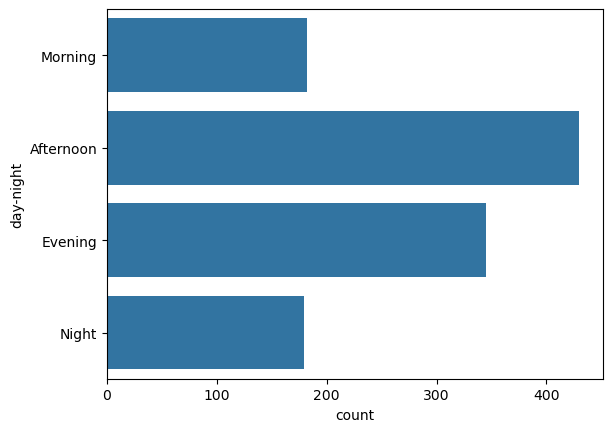

In [178]:
sns.countplot(dataset['day-night'])

In [180]:
# Mostly booked ober at the time of Afternoon than Evening and so on

In [182]:
# 4. In which months do people book Uber rides less frequently?
# 5. On which days of the week do people book the Uber rides the most?

In [184]:
 # Now for the solution of these two questions we have to make two new monts and week columns

In [194]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE*']).month

month_label = {
    1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
    5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Agust',
    9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'
}

dataset['MONTH'] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

In [196]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date,time,day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

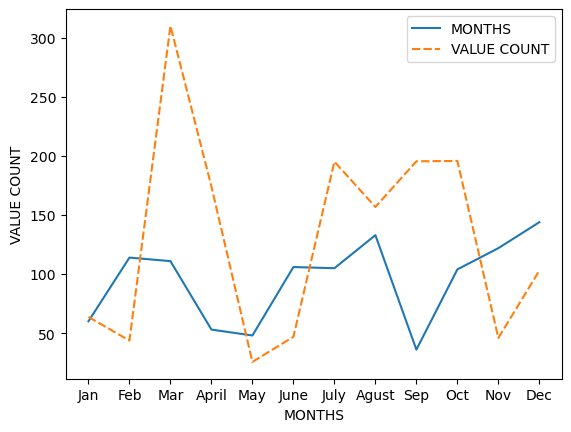

In [208]:
df = pd.DataFrame({
        "MONTHS": mon.values,
        "VALUE COUNT": dataset.groupby('MONTH', sort=False)['MILES*'].max()
    
})

p = sns.lineplot(data=df)
p.set(xlabel='MONTHS', ylabel='VALUE COUNT')

In [210]:
# Jan, Nov, Dec rides are minimum

In [212]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date,time,day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


In [220]:
# Extract the numeric day of the week (0 = Monday, 6 = Sunday)
dataset['Day'] = dataset['START_DATE*'].dt.weekday

# Define a dictionary to map numeric days to their labels
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}

# Map the numeric days to day names
dataset['Day'] = dataset['Day'].map(day_label)

# Display the dataset to verify
print(dataset[['START_DATE*', 'Day']])


             START_DATE*   Day
0    2016-01-01 21:11:00   Fri
1    2016-01-02 01:25:00   Sat
2    2016-01-02 20:25:00   Sat
3    2016-01-05 17:31:00  Tues
4    2016-01-06 14:42:00   Wed
...                  ...   ...
1150 2016-12-31 01:07:00   Sat
1151 2016-12-31 13:24:00   Sat
1152 2016-12-31 15:03:00   Sat
1153 2016-12-31 21:32:00   Sat
1154 2016-12-31 22:08:00   Sat

[1136 rows x 2 columns]


In [222]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date,time,day-night,MONTH,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


Text(0, 0.5, 'COUNT')

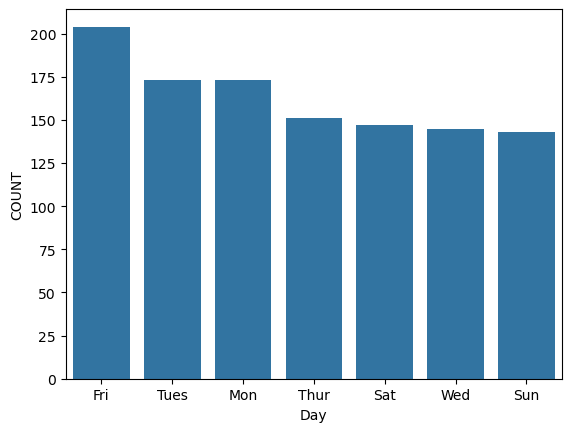

In [230]:
day_label = dataset.Day.value_counts()

sns.barplot(x=day_label.index, y = day_label)
plt.xlabel('Day')
plt.ylabel('COUNT')


In [232]:
# 6. How many miles do people usually book a cab for through Uber?

<Axes: ylabel='MILES*'>

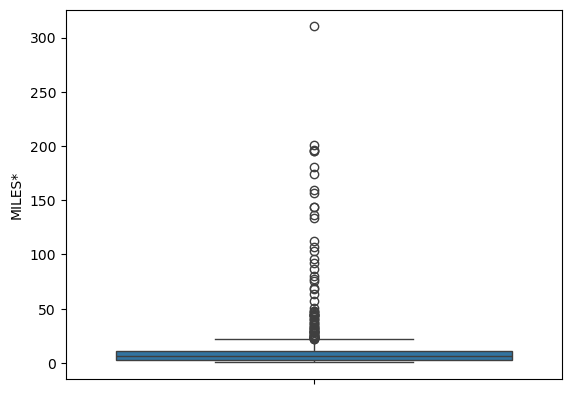

In [236]:
sns.boxplot(dataset['MILES*'])

<Axes: ylabel='MILES*'>

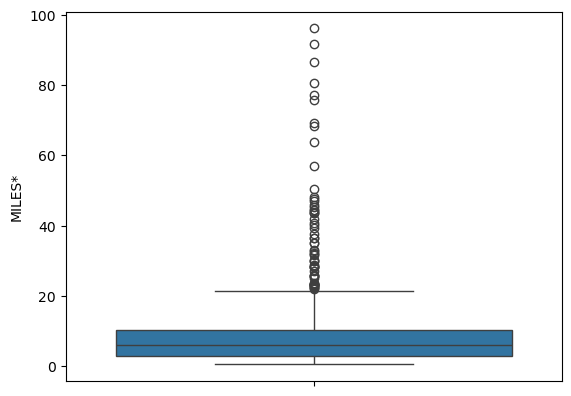

In [240]:
sns.boxplot(dataset[dataset['MILES*']<100]['MILES*'])

<Axes: ylabel='MILES*'>

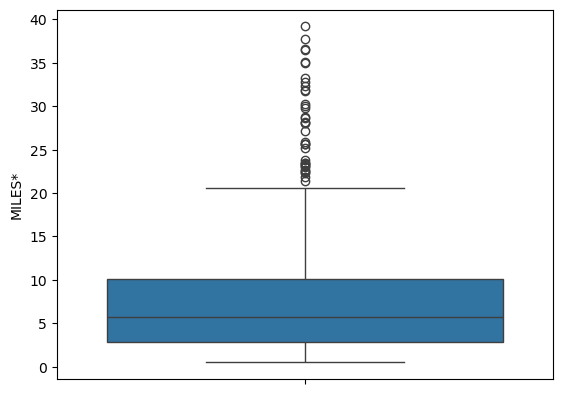

In [242]:
sns.boxplot(dataset[dataset['MILES*']<40]['MILES*'])

C:\Users\user\AppData\Local\Temp\ipykernel_6452\564126997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES*']<40]['MILES*'])


<Axes: xlabel='MILES*', ylabel='Density'>

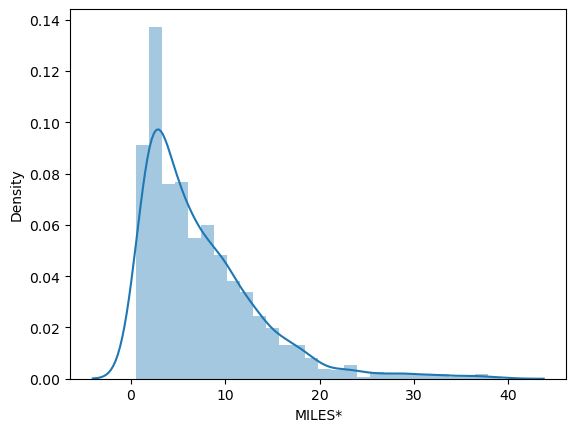

In [248]:
sns.distplot(dataset[dataset['MILES*']<40]['MILES*'])

In [ ]:
# Mostly used for 0 - 20 miles 